### Webscrapping and EDA in Python 

This notebook scrape data from a Wikipedia website table and analyze the data in the Jupyter notebook.  For this analysis I will use data on the 50 largest companies by revenue.  If you are interested in the original website and table you can view it here: 

https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue

Let's get started. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#import the library to query a website
import requests

In [2]:
# specify the url
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"


In [3]:
# Open website URL and return the html to the variable 'response'
response = requests.get(url)

In [4]:
# import Beautiful soup library to access functions to parse the data returned from the website
from bs4 import BeautifulSoup

In [5]:
response.encoding

'UTF-8'

In [6]:
response

<Response [200]>

In [7]:
# Parse the html in the 'response' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(response.text, "lxml")

In [8]:
print(soup.prettify)

<bound method BeautifulSoup.prettify of <!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies by revenue - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_largest_companies_by_revenue","wgTitle":"List of largest companies by revenue","wgCurRevisionId":788750814,"wgRevisionId":788750814,"wgArticleId":997455,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from April 2017","All articles containing potentially dated statements","Lists of companies by revenue"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContent

In [9]:
soup.title

<title>List of largest companies by revenue - Wikipedia</title>

In [10]:
soup.title.string

'List of largest companies by revenue - Wikipedia'

In [11]:
# find the table
all_tables=soup.find_all('table')

In [12]:
print(all_tables)

[<table class="wikitable sortable" style="text-align:left;">
<tr>
<th>Rank</th>
<th scope="col">Name</th>
<th scope="col">Industry</th>
<th scope="col">Revenue (USD million)</th>
<th>Revenue growth</th>
<th scope="col">Employees</th>
<th scope="col">Country</th>
<th scope="col">Headquarters</th>
<th scope="col">CEO</th>
<th scope="col">Ref</th>
</tr>
<tr>
<th scope="row">1</th>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a></td>
<td><a href="/wiki/Retail" title="Retail">Retail</a></td>
<td style="text-align:right;">$485,870</td>
<td style="text-align:right;"><img alt="Decrease" data-file-height="300" data-file-width="300" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" title="Decrease" width="11"/> <span class="sortkey" style=

In [13]:
right_table=soup.find('table', class_="wikitable sortable")
right_table

<table class="wikitable sortable" style="text-align:left;">
<tr>
<th>Rank</th>
<th scope="col">Name</th>
<th scope="col">Industry</th>
<th scope="col">Revenue (USD million)</th>
<th>Revenue growth</th>
<th scope="col">Employees</th>
<th scope="col">Country</th>
<th scope="col">Headquarters</th>
<th scope="col">CEO</th>
<th scope="col">Ref</th>
</tr>
<tr>
<th scope="row">1</th>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a></td>
<td><a href="/wiki/Retail" title="Retail">Retail</a></td>
<td style="text-align:right;">$485,870</td>
<td style="text-align:right;"><img alt="Decrease" data-file-height="300" data-file-width="300" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/11px-Decrease2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/17px-Decrease2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Decrease2.svg/22px-Decrease2.svg.png 2x" title="Decrease" width="11"/> <span class="sortkey" style="

In [14]:
#Generate lists
Rank=[]
Name=[]
Industry=[]
Revenue_Millions=[]
Revenue_Growth=[]
Employees=[]
Country=[]
Headquarters=[]
CEO=[]
Ref=[]

# skip first iteration as we dont need headers 
for row in right_table.findAll("tr")[1:]: 
    ranking=row.findAll('th') # To store rankings in <th> tag
    cells = row.findAll('td') # To store all other details
    if len(cells)>2: # Only extract information if there is table body not heading
        Rank.append(ranking[0].find(text=True))
        Name.append(cells[0].find(text=True))
        Industry.append(cells[1].find(text=True))
        Revenue_Millions.append(cells[2].find(text=True))
        Revenue_Growth.append(cells[3].find(text=True))
        Employees.append(cells[4].find(text=True))
        Country.append(cells[5].find(text=True))
        Headquarters.append(cells[6].find(text=True))
        CEO.append(cells[7].find(text=True))
        Ref.append(cells[8].find(text=True))

In [15]:
#import pandas to convert list to data frame
import pandas as pd
df=pd.DataFrame(Rank,columns=['Rank'])
df['Name']=Name
df['Industry']=Industry
df['Revenue_Millions']=Revenue_Millions
df['Revenue_Growth']=Revenue_Growth
df['Employees']=Employees
df['Country']=Country
df['Headquarters']=Headquarters
df['CEO']=CEO
df['Ref']=Ref
df 

,Rank,Name,Industry,Revenue_Millions,Revenue_Growth,Employees,Country,Headquarters,CEO,Ref
0,1,Walmart,Retail,"$485,870",,"2,300,000",None,"Bentonville, Arkansas",Doug McMillon,[1]
1,2,State Grid,Electric utility,"$329,601",,"927,839",None,Beijing,Shu Yinbiao,[2]
2,3,China National Petroleum,Oil and gas,"$299,271",,"1,589,508",None,Beijing,Wang Yilin,[3]
3,4,Sinopec Group,Oil and gas,"$294,344",,"810,538",None,Beijing,Wang Yupu,[4]
4,5,Royal Dutch Shell,Oil and gas,"$272,156",,"90,000",,The Hague,Ben van Beurden,[5]
5,6,Exxon Mobil,Oil and gas,"$246,204",,"75,600",None,"Irving, Texas",Darren Woods,[6]
6,7,Volkswagen,Automotive,"$236,600",,"610,070",None,Wolfsburg,Matthias Müller,[7]
7,8,Toyota,Automotive,"$236,592",,"348,877",None,"Toyota, Aichi",Akio Toyoda,[8]
8,9,Apple,Consumer electronics,"$233,715",,"110,000",None,"Cupertino, California",Tim Cook,[9]
9,10,BP,Oil and gas,"$225,982",,"79,800",None,London,Bob Dudley,[10]


In [16]:
# strip the $ off the Revenue column         
df['Revenue_Millions'] = df['Revenue_Millions'].map(lambda x: x.lstrip('$'))
df.head()

,Rank,Name,Industry,Revenue_Millions,Revenue_Growth,Employees,Country,Headquarters,CEO,Ref
0,1,Walmart,Retail,"485,870",,"2,300,000",None,"Bentonville, Arkansas",Doug McMillon,[1]
1,2,State Grid,Electric utility,"329,601",,"927,839",None,Beijing,Shu Yinbiao,[2]
2,3,China National Petroleum,Oil and gas,"299,271",,"1,589,508",None,Beijing,Wang Yilin,[3]
3,4,Sinopec Group,Oil and gas,"294,344",,"810,538",None,Beijing,Wang Yupu,[4]
4,5,Royal Dutch Shell,Oil and gas,"272,156",,"90,000",,The Hague,Ben van Beurden,[5]


In [17]:
# convert those number columns from strings to floats 
cols_to_convert = ['Rank', 'Revenue_Millions', 'Employees']

for col in cols_to_convert:
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].astype(int)

df.head()


# -----conversion code ------
# df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce')
#df['Employees'] = pd.to_numeric(df['Employees'], errors='raise', downcast='integer')
#df['Employees'] = df['Employees'].str.replace(',', '')
#df['Employees'] = df['Employees'].astype(int)

,Rank,Name,Industry,Revenue_Millions,Revenue_Growth,Employees,Country,Headquarters,CEO,Ref
0,1,Walmart,Retail,485870,,2300000,None,"Bentonville, Arkansas",Doug McMillon,[1]
1,2,State Grid,Electric utility,329601,,927839,None,Beijing,Shu Yinbiao,[2]
2,3,China National Petroleum,Oil and gas,299271,,1589508,None,Beijing,Wang Yilin,[3]
3,4,Sinopec Group,Oil and gas,294344,,810538,None,Beijing,Wang Yupu,[4]
4,5,Royal Dutch Shell,Oil and gas,272156,,90000,,The Hague,Ben van Beurden,[5]


In [18]:
# check out column data types to make sure the changes look good 
df.dtypes

Rank                 int64
Name                object
Industry            object
Revenue_Millions     int64
Revenue_Growth      object
Employees            int64
Country             object
Headquarters        object
CEO                 object
Ref                 object
dtype: object

In [19]:
df.describe()

,Rank,Revenue_Millions,Employees
count,50.00000,50.00000,5.000000e+01
mean,25.50000,164900.18000,3.427112e+05
std,14.57738,73607.09085,4.048093e+05
min,1.00000,102567.00000,7.300000e+03
25%,13.25000,116839.75000,1.042910e+05
50%,25.50000,140801.00000,2.361370e+05
75%,37.75000,175704.25000,3.449078e+05
max,50.00000,485870.00000,2.300000e+06


/usr/lib/python3.4/site-packages/seaborn/categorical.py:2894: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


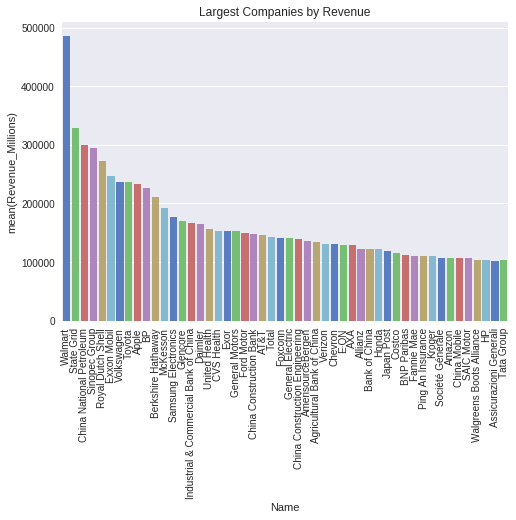

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
bar_plot = sns.barplot(x=df["Name"],y=df["Revenue_Millions"],
                        palette="muted",
                        x_order=df["Name"].tolist())
plt.title('Largest Companies by Revenue')
plt.xticks(rotation=90)
plt.show()


/usr/lib/python3.4/site-packages/seaborn/categorical.py:2894: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


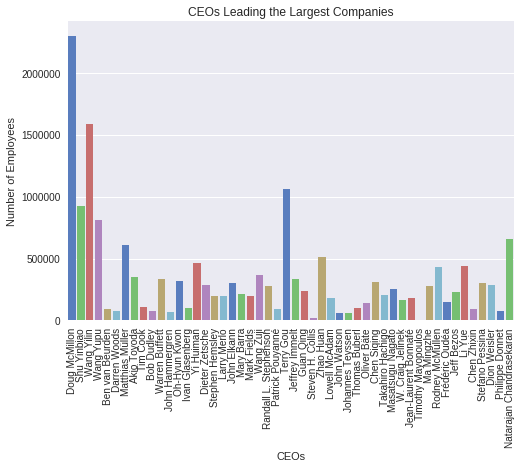

In [21]:

sns.set_style("darkgrid")
bar_plot = sns.barplot(x=df["CEO"],y=df["Employees"],
                        palette="muted",
                        x_order=df["CEO"].tolist())
bar_plot.set(xlabel='CEOs', ylabel='Number of Employees')
plt.title('CEOs Leading the Largest Companies')
plt.xticks(rotation=90)
plt.show()


In [22]:
new_df = df[['Name','Industry','Revenue_Millions', 'Employees', 'CEO']]
new_df.head()

,Name,Industry,Revenue_Millions,Employees,CEO
0,Walmart,Retail,485870,2300000,Doug McMillon
1,State Grid,Electric utility,329601,927839,Shu Yinbiao
2,China National Petroleum,Oil and gas,299271,1589508,Wang Yilin
3,Sinopec Group,Oil and gas,294344,810538,Wang Yupu
4,Royal Dutch Shell,Oil and gas,272156,90000,Ben van Beurden


In [23]:
# convert industry variable to categorical 
new_df['Industry'] = new_df['Industry'].astype('category')
new_df.dtypes

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name                  object
Industry            category
Revenue_Millions       int64
Employees              int64
CEO                   object
dtype: object

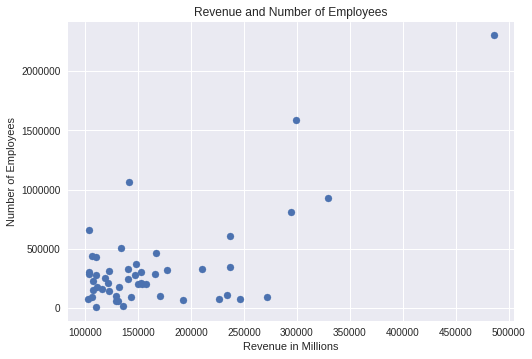

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(new_df['Revenue_Millions'],new_df['Employees']) 
ax.set(xlabel='Revenue in Millions', ylabel='Number of Employees')
plt.title('Revenue and Number of Employees')
plt.show()

# simple scatter plot method 
# df.plot(x='Revenue_Millions', y='Employees', kind='scatter')

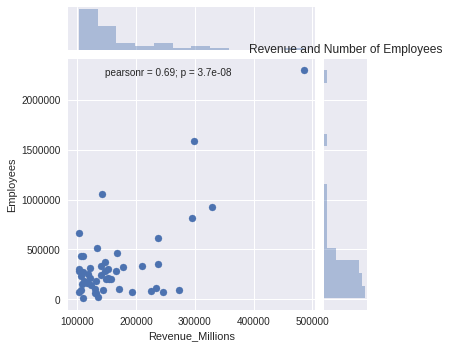

In [74]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Revenue_Millions", y="Employees", data=df, size=5)
plt.title('Revenue and Number of Employees')
plt.show()

A quick glance at our pattern suggests there might be a linear relationship between revenue and number of employees for large companies.  Let's try plotting a linear line and checking the Pearson correlation coefficient.  

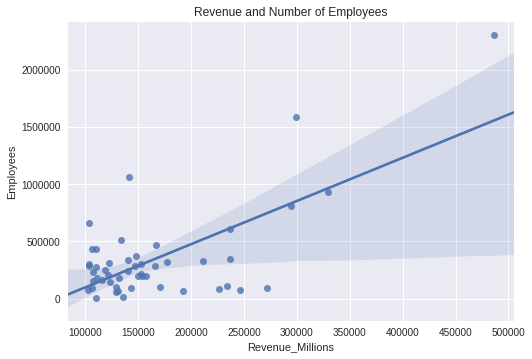

In [75]:
# plot a regression line over the variables
sns.regplot(x="Revenue_Millions", y="Employees", data=new_df);
plt.title('Revenue and Number of Employees')
plt.show()

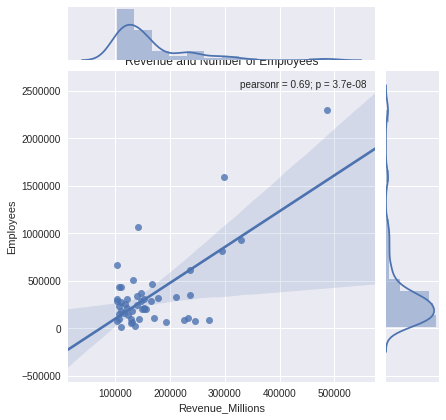

In [76]:
# let's add a little more detail to show Pearson cor cof.  Seems like there is a realationship here, but I would caution building 
# a linear model here as we are only working with 50 records.  Ideally we'd like more data on companies revenue and employee size
# to understand this relationship more and perhaps build a useful model from such data. 

sns.jointplot(x="Revenue_Millions", y="Employees", data=new_df, kind="reg")
plt.title('Revenue and Number of Employees')
plt.show()

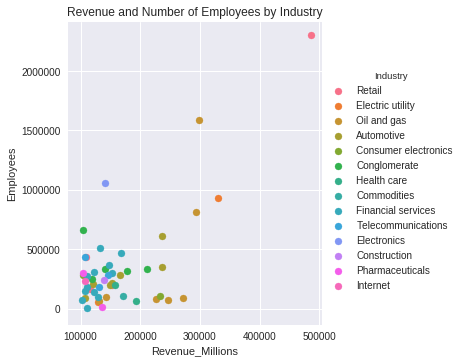

In [77]:
sns.FacetGrid(df, hue="Industry", size=5) \
   .map(plt.scatter, "Revenue_Millions", "Employees") \
   .add_legend()
plt.title('Revenue and Number of Employees by Industry')
plt.show()

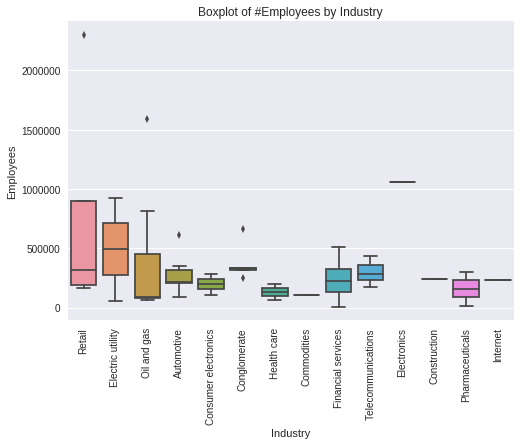

In [78]:
sns.boxplot(x="Industry", y="Employees", data=df) 
plt.xticks(rotation=90)
plt.title('Boxplot of #Employees by Industry')
plt.show()

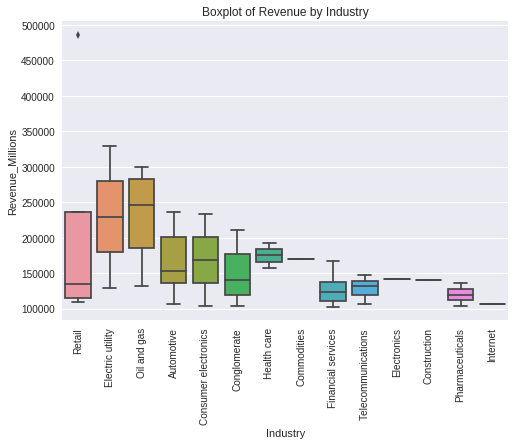

In [79]:
sns.boxplot(x="Industry", y="Revenue_Millions", data=df) 
plt.xticks(rotation=90)
plt.title('Boxplot of Revenue by Industry')
plt.show()

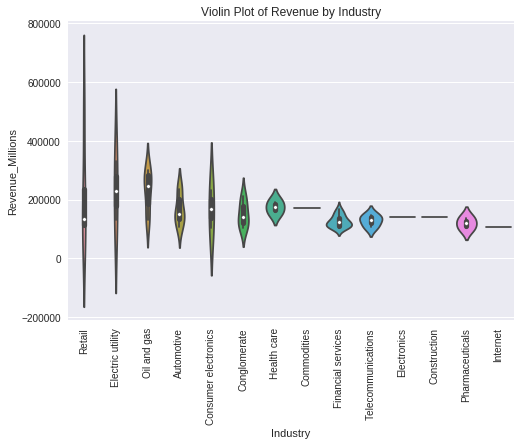

In [80]:
sns.violinplot(x="Industry", y="Revenue_Millions", data=df, size=6)
plt.xticks(rotation=90)
plt.title('Violin Plot of Revenue by Industry')
plt.show()

In [42]:
industry_sum = new_df.groupby(['Industry']).sum()
ind = pd.DataFrame(industry_sum)
ind.columns = ['Revenue', 'Employees']

ind

,Revenue,Employees
Industry,,
Automotive,1169214,1958141
Commodities,170497,102388
Conglomerate,750922,1894676
Construction,140159,241474
Consumer electronics,337070,397000
Electric utility,458878,984329
Electronics,141213,1060000
Financial services,1518183,2889484
Health care,349594,268000


In [65]:
# we've got a new dataframe, but need to add the industry values to plot this 
ind_series = pd.Series(['Automotive', 'Commodities', 'Conglomerate', 'Construction', 
                                  'Consumer Electronics', 'Electric Utility', 'Electronics', 'Financial Services', 
                                 'Health Care', 'Internet', 'Oil and Gas', 'Pharmaceuticals', 'Retail', 'Telecommunications'])
ind_series.index = ind.index
ind['Industries'] = ind_series

# convert  variable to categorical 
ind['Industries'] = ind['Industries'].astype('category')
ind.dtypes


Revenue          int64
Employees        int64
Industries    category
dtype: object

Now we'll examine the total revenue of the top 50 companies by industry.  

Oil and Gas, Financial Service, and the Auto Industry are the largest 

/usr/lib/python3.4/site-packages/seaborn/categorical.py:2894: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


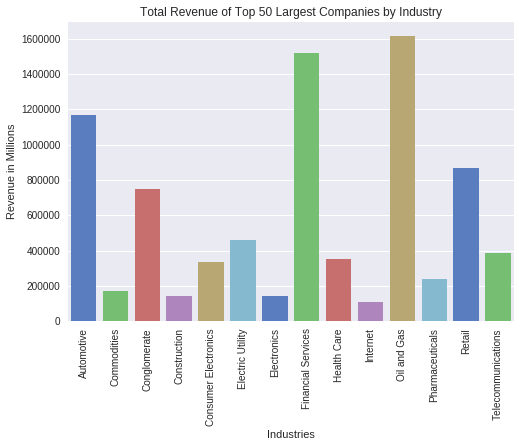

In [72]:
import seaborn as sns
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=ind["Industries"],y=ind["Revenue"],
                        palette="muted",
                        x_order=ind["Industries"].tolist())
bar_plot.set(xlabel='Industries', ylabel='Revenue in Millions')
plt.title('Total Revenue of Top 50 Largest Companies by Industry')
plt.xticks(rotation=90)
plt.show()

/usr/lib/python3.4/site-packages/seaborn/categorical.py:2894: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


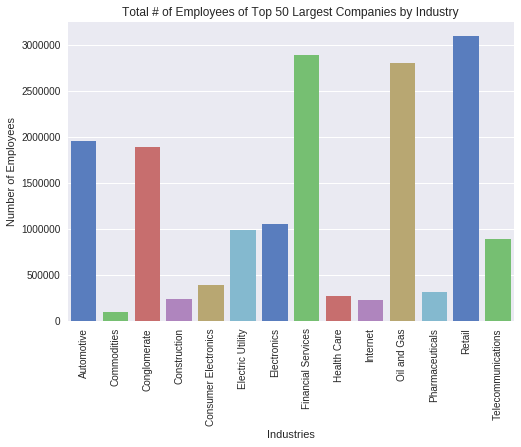

In [73]:
import seaborn as sns
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=ind["Industries"],y=ind["Employees"],
                        palette="muted",
                        x_order=ind["Industries"].tolist())
bar_plot.set(xlabel='Industries', ylabel='Number of Employees')
plt.title('Total # of Employees of Top 50 Largest Companies by Industry')
plt.xticks(rotation=90)
plt.show()

Key Takeaways 

Among the top 50 companies by Revenue...

* There appears to be a relationship betweeen Employee Size and Revnue 
* Oil and Gas, Financial Service, Auto, and Retail Industries generate the largest amount of revenue and employee the largest number of people 
* Walmart is the largest company in the world by revenue 

Possible Next Steps...

* Feature engineering - analyze which cities/countries these top firms are located in 
* Can anything be done with the CEO columns.  Perhaps adding a new feature of where they were educated to see if there's any trends
* Is it possible to add more data and build a linear model between the employee size and revenue variables
